In [22]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px

**Data loading**

In [3]:
#Reading the csv file
df=pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')

In [4]:
#accessing the head of the csv file
df.head(10)

Unnamed: 0          id                                                url  \
0      362773  7307679724  https://abilene.craigslist.org/ctd/d/abilene-2...   
1      362712  7311833696  https://abilene.craigslist.org/ctd/d/abilene-2...   
2      362722  7311441996  https://abilene.craigslist.org/ctd/d/abilene-2...   
3      362771  7307680715  https://abilene.craigslist.org/ctd/d/abilene-2...   
4      362710  7311834578  https://abilene.craigslist.org/ctd/d/abilene-2...   
5      362772  7307680254  https://abilene.craigslist.org/ctd/d/abilene-2...   
6      362711  7311834077  https://abilene.craigslist.org/ctd/d/abilene-2...   
7      362723  7311441803  https://abilene.craigslist.org/ctd/d/abilene-2...   
8      362763  7308988448  https://abilene.craigslist.org/ctd/d/abilene-2...   
9      362752  7309998951  https://abilene.craigslist.org/ctd/d/abilene-2...   

    region                      region_url  price    year manufacturer  \
0  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
1  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
2  abilene  https://abilene.craigslist.org   4900  2006.0       toyota   
3  abilene  https://abilene.craigslist.org   6500  2008.0         ford   
4  abilene  https://abilene.craigslist.org   6500  2008.0         ford   
5  abilene  https://abilene.craigslist.org   6500  2008.0        honda   
6  abilene  https://abilene.craigslist.org   6500  2008.0        honda   
7  abilene  https://abilene.craigslist.org  11500  2014.0        honda   
8  abilene  https://abilene.craigslist.org  11125  2014.0       toyota   
9  abilene  https://abilene.craigslist.org  13500  2016.0     chrysler   

            model  condition  ...      type paint_color  \
0              x5        NaN  ...       NaN         NaN   
1              x5        NaN  ...       NaN         NaN   
2           camry  excellent  ...     sedan      silver   
3      expedition        NaN  ...       NaN         NaN   
4      expedition        NaN  ...       NaN         NaN   
5         odyssey        NaN  ...       NaN         NaN   
6         odyssey        NaN  ...       NaN         NaN   
7            cr-v  excellent  ...       SUV         NaN   
8           camry       good  ...     sedan        grey   
9  town & country  excellent  ...  mini-van        grey   

                                           image_url  \
0  https://images.craigslist.org/00m0m_iba78h8ty9...   
1  https://images.craigslist.org/00m0m_iba78h8ty9...   
2  https://images.craigslist.org/00808_5FkOw2aGjA...   
3  https://images.craigslist.org/00M0M_i9CoFvVq8o...   
4  https://images.craigslist.org/00M0M_i9CoFvVq8o...   
5  https://images.craigslist.org/01616_fGayd5FvZb...   
6  https://images.craigslist.org/01616_fGayd5FvZb...   
7  https://images.craigslist.org/00N0N_4rGuHY0K9w...   
8  https://images.craigslist.org/00Y0Y_lzoRI0OvfB...   
9  https://images.craigslist.org/00l0l_2FtEUW2H9O...   

                                         description county state        lat  \
0  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
1  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
2  2006 TOYOTA CAMRY LE Sedan   Ready To Upgrade ...    NaN    tx  32.453848   
3  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   
4  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   
5  $6500.00 Cash  2008 Honda Odyssey  6 cylinder ...    NaN    tx  32.401556   
6  $6500.00 Cash  2008 Honda Odyssey  6 cylinder ...    NaN    tx  32.401556   
7  2014 HONDA CR-V LX SUV   Ready To Upgrade Your...    NaN    tx  32.453848   
8  2014 Grey Toyota Camry LE 4 dr with very clean...    NaN    tx  32.339483   
9  2016 CHRYSLER TOWN & COUNTRY TOURING Mini-Van ...    NaN    tx  32.453848   

        long               posting_date               removal_date  
0 -99.884713  2021-04-16 00:00:00+00:00  2021-05-02 00:00:00+00:00  
1 -99.884713  2021-04

In [5]:
#shape of the dataset
df.shape

(426880, 28)

In [6]:
#description of the data
df.describe()


Unnamed: 0            id         price           year      odometer  \
count  426880.000000  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05   
mean   213439.500000  7.311487e+09  7.519903e+04    2011.235191  9.804333e+04   
std    123229.785793  4.473170e+06  1.218228e+07       9.452120  2.138815e+05   
min         0.000000  7.207408e+09  0.000000e+00    1900.000000  0.000000e+00   
25%    106719.750000  7.308143e+09  5.900000e+03    2008.000000  3.770400e+04   
50%    213439.500000  7.312621e+09  1.395000e+04    2013.000000  8.554800e+04   
75%    320159.250000  7.315254e+09  2.648575e+04    2017.000000  1.335425e+05   
max    426879.000000  7.317101e+09  3.736929e+09    2022.000000  1.000000e+07   

       county            lat           long  
count     0.0  420331.000000  420331.000000  
mean      NaN      38.493940     -94.748599  
std       NaN       5.841533      18.365462  
min       NaN     -84.122245    -159.827728  
25%       NaN      34.601900    -111.939847  
50%       NaN      39.150100     -88.432600  
75%       NaN      42.398900     -80.832039  
max       NaN      82.390818     173.885502

In [7]:
#checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [8]:
#looking into the columns
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [9]:
df['posting_date']=pd.to_datetime(df['posting_date'],utc=True)

In [11]:
df.head(5)

Unnamed: 0          id                                                url  \
0      362773  7307679724  https://abilene.craigslist.org/ctd/d/abilene-2...   
1      362712  7311833696  https://abilene.craigslist.org/ctd/d/abilene-2...   
2      362722  7311441996  https://abilene.craigslist.org/ctd/d/abilene-2...   
3      362771  7307680715  https://abilene.craigslist.org/ctd/d/abilene-2...   
4      362710  7311834578  https://abilene.craigslist.org/ctd/d/abilene-2...   

    region                      region_url  price    year manufacturer  \
0  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
1  abilene  https://abilene.craigslist.org   4500  2002.0          bmw   
2  abilene  https://abilene.craigslist.org   4900  2006.0       toyota   
3  abilene  https://abilene.craigslist.org   6500  2008.0         ford   
4  abilene  https://abilene.craigslist.org   6500  2008.0         ford   

        model  condition  ...   type paint_color  \
0          x5        NaN  ...    NaN         NaN   
1          x5        NaN  ...    NaN         NaN   
2       camry  excellent  ...  sedan      silver   
3  expedition        NaN  ...    NaN         NaN   
4  expedition        NaN  ...    NaN         NaN   

                                           image_url  \
0  https://images.craigslist.org/00m0m_iba78h8ty9...   
1  https://images.craigslist.org/00m0m_iba78h8ty9...   
2  https://images.craigslist.org/00808_5FkOw2aGjA...   
3  https://images.craigslist.org/00M0M_i9CoFvVq8o...   
4  https://images.craigslist.org/00M0M_i9CoFvVq8o...   

                                         description county state        lat  \
0  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
1  $4,500 Cash  2002 BMW X5  8 cylinder 4.4L moto...    NaN    tx  32.401556   
2  2006 TOYOTA CAMRY LE Sedan   Ready To Upgrade ...    NaN    tx  32.453848   
3  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   
4  $6500.00 2008 Ford Expedition  8 cylinder 5.4L...    NaN    tx  32.401556   

        long              posting_date               removal_date  
0 -99.884713 2021-04-16 00:00:00+00:00  2021-05-02 00:00:00+00:00  
1 -99.884713 2021-04-24 00:00:00+00:00  2021-04-28 00:00:00+00:00  
2 -99.787900 2021-04-23 00:00:00+00:00  2021-05-25 00:00:00+00:00  
3 -99.884713 2021-04-16 00:00:00+00:00  2021-04-26 00:00:00+00:00  
4 -99.884713 2021-04-24 00:00:00+00:00  2021-05-12 00:00:00+00:00  

[5 rows x 28 columns]

<Axes: >

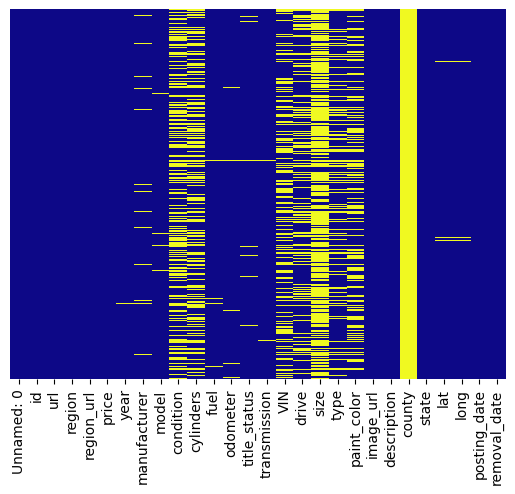

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [14]:
#checking the null values 
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

**Handling missing values categorical data with mode and numerical data with mean ******

In [15]:
def handling_missing_values(df):
    numerical_columns=['year','odometer']
    df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())
    categorical_columns=['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','posting_date']
    df[categorical_columns]=df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))
    return df
df=handling_missing_values(df)

In [17]:
def convert_to_tz(posting_date):
    if not posting_date.tzinfo:
        return posting_date.replace(tzinfo=pytz.utc)
    else:
        return posting_date
df['posting_date']=df['posting_date'].apply(convert_to_tz)
df_ag=df.groupby(['region','type','posting_date']).size().reset_index(name='count')
df_ag=df_ag.sort_values(by='posting_date')
print(df_ag.head(5))

                     region   type              posting_date  count
47326             rochester  coupe 2021-04-04 00:00:00+00:00      4
13306  dayton / springfield  sedan 2021-04-04 00:00:00+00:00      4
1590     anchorage / mat-su  wagon 2021-04-04 00:00:00+00:00      1
13367  dayton / springfield    van 2021-04-04 00:00:00+00:00      1
36157              missoula    SUV 2021-04-04 00:00:00+00:00      1


In [21]:
#Creating time series frequency graph.
df_freq=df_ag.groupby(pd.Grouper(key='posting_date',freq='D')).sum().reset_index()
fig_freq=go.Figure(data=go.Bar(
x=df_freq['posting_date'],
y=df_freq['count'],
marker_color='royalblue',
opacity=0.8
))

fig_freq.update_layout(
    title='Time Frequency graph: No. of Vehicle listings per Day',
    xaxis_title='Posting Date',
    yaxis_title='No. of vehicles listings',
    xaxis_tickangle=-45,
    
)
fig_freq.show()

In [23]:
#creating time series chart 
fig=px.line(df_ag,x='posting_date',y='count',color='region',line_group='type',
           title='No. of available vehicles over Time by region and Vehicle Type',
           labels={'count':'No. of vehicles'})
fig.update_layout(
    xaxis_title='Posting Date',
    yaxis_title='No. of Vehicles',
    hovermode='x',
    showlegend=True)
fig.show()